In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import json
import time
from datetime import datetime
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

# we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lats_lngs = zip(lats,lngs)
lats_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)


In [7]:
# Use the print() function to display the latitude and longitude combinations.
# Using CitiPy module, get the nearest city name and country code for the list of lats_lngs.
# First, create a list to hold the cities.
cities = []

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
print(len(cities))

583


In [8]:
# URL to make the API call and get the weather data.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_Count = 1

# Loop through all the cities in our list.
for i , city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_Count += 1
        record_count = 1
        time.sleep(60)

     # Create endpoint URL with each city.
    city_url = url +"&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_Count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Exception Handling
    try:
        response = requests.get(city_url)
        city_weather = response.json()
       
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
  
        # Append the city information into city_data list.
        city_data.append({"City":city.title(),
                             "Latitude":city_lat,
                             "Longitude":city_lng,
                             "Max Temp":city_max_temp,
                             "Humidity":city_humidity,
                             "Clouds":city_clouds,
                             "Wind":city_wind,
                             "Country":city_country,
                             "Date":city_date})
    except:
        print("City not found. Skipping...")
        pass
        
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | sakakah
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | urusha
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | great yarmouth
Processing Record 11 of Set 1 | grand gaube
Processing Record 12 of Set 1 | rio gallegos
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | newport
Processing Record 22 of Set 1 | qinggang
Processing Record 23 of Set 

Processing Record 35 of Set 4 | verkhnyaya inta
Processing Record 36 of Set 4 | lavrentiya
Processing Record 37 of Set 4 | brae
Processing Record 38 of Set 4 | u thong
Processing Record 39 of Set 4 | vila
Processing Record 40 of Set 4 | luganville
Processing Record 41 of Set 4 | lasa
Processing Record 42 of Set 4 | praia da vitoria
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | turinsk
Processing Record 45 of Set 4 | warqla
City not found. Skipping...
Processing Record 46 of Set 4 | mitchell
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | lagos
Processing Record 50 of Set 4 | honningsvag
Processing Record 1 of Set 5 | ahipara
Processing Record 2 of Set 5 | baruun-urt
Processing Record 3 of Set 5 | jimenez
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | samana
Processing Record 6 of Set 5 | havre-saint-pierre
Processing Record 7 of Set 5 | kahului
Processing Rec

Processing Record 22 of Set 8 | macapa
Processing Record 23 of Set 8 | acapulco
Processing Record 24 of Set 8 | arlit
Processing Record 25 of Set 8 | tianpeng
Processing Record 26 of Set 8 | jiangyou
Processing Record 27 of Set 8 | kisangani
Processing Record 28 of Set 8 | irricana
Processing Record 29 of Set 8 | natchez
Processing Record 30 of Set 8 | chernyshevskiy
Processing Record 31 of Set 8 | wahran
City not found. Skipping...
Processing Record 32 of Set 8 | cairns
Processing Record 33 of Set 8 | yanan
City not found. Skipping...
Processing Record 34 of Set 8 | soyo
Processing Record 35 of Set 8 | novyy urengoy
Processing Record 36 of Set 8 | chernyy yar
Processing Record 37 of Set 8 | madang
Processing Record 38 of Set 8 | mocambique
City not found. Skipping...
Processing Record 39 of Set 8 | roald
Processing Record 40 of Set 8 | kamsack
Processing Record 41 of Set 8 | mamallapuram
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | visby
Processing Record 44

Processing Record 10 of Set 12 | keti bandar
Processing Record 11 of Set 12 | fukue
Processing Record 12 of Set 12 | haftoni
Processing Record 13 of Set 12 | carutapera
Processing Record 14 of Set 12 | palatka
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | wajid
Processing Record 17 of Set 12 | topolobampo
Processing Record 18 of Set 12 | kuching
Processing Record 19 of Set 12 | mogadishu
Processing Record 20 of Set 12 | chichicapam
City not found. Skipping...
Processing Record 21 of Set 12 | port hedland
Processing Record 22 of Set 12 | coihaique
Processing Record 23 of Set 12 | karratha
Processing Record 24 of Set 12 | tura
Processing Record 25 of Set 12 | maarianhamina
Processing Record 26 of Set 12 | tuatapere
Processing Record 27 of Set 12 | ajdabiya
Processing Record 28 of Set 12 | niamey
Processing Record 29 of Set 12 | banjar
Processing Record 30 of Set 12 | biak
Processing Record 31 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 

In [23]:
len(city_data)

531

In [24]:
# Convert the array of dictionaries into a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Alofi,-19.0595,-169.9187,80.49,69,75,11.50,NU,2022-09-16 03:48:09
1,Hermanus,-34.4187,19.2345,55.80,91,98,3.65,ZA,2022-09-16 03:48:09
2,Sakakah,29.9697,40.2064,78.37,25,0,5.66,SA,2022-09-16 03:48:10
3,Lompoc,34.6391,-120.4579,63.01,88,100,13.80,US,2022-09-16 03:46:27
4,Punta Arenas,-53.1500,-70.9167,32.11,69,0,5.75,CL,2022-09-16 03:47:04
5,Mahebourg,-20.4081,57.7000,73.26,78,40,11.50,MU,2022-09-16 03:48:12
6,Urusha,54.0500,122.9000,54.28,51,69,2.13,RU,2022-09-16 03:48:13
7,Guerrero Negro,27.9769,-114.0611,70.05,79,0,17.58,MX,2022-09-16 03:47:45
8,Great Yarmouth,52.6083,1.7305,51.03,73,56,16.28,GB,2022-09-16 03:48:13
9,Grand Gaube,-20.0064,57.6608,73.38,65,1,11.99,MU,2022-09-16 03:48:14


In [12]:
# we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_columns_list = ["City","Country","Date","Latitude","Longitude","Max Temp","Humidity","Clouds","Wind"]

city_data_df = city_data_df[new_columns_list]
city_data_df.columns

Index(['City', 'Country', 'Date', 'Latitude', 'Longitude', 'Max Temp',
       'Humidity', 'Clouds', 'Wind'],
      dtype='object')

In [13]:
# Display the DataFrame
city_data_df.head(10)

,City,Country,Date,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind
0,Alofi,NU,2022-09-16 03:48:09,-19.0595,-169.9187,80.49,69,75,11.50
1,Hermanus,ZA,2022-09-16 03:48:09,-34.4187,19.2345,55.80,91,98,3.65
2,Sakakah,SA,2022-09-16 03:48:10,29.9697,40.2064,78.37,25,0,5.66
3,Lompoc,US,2022-09-16 03:46:27,34.6391,-120.4579,63.01,88,100,13.80
4,Punta Arenas,CL,2022-09-16 03:47:04,-53.1500,-70.9167,32.11,69,0,5.75
5,Mahebourg,MU,2022-09-16 03:48:12,-20.4081,57.7000,73.26,78,40,11.50
6,Urusha,RU,2022-09-16 03:48:13,54.0500,122.9000,54.28,51,69,2.13
7,Guerrero Negro,MX,2022-09-16 03:47:45,27.9769,-114.0611,70.05,79,0,17.58
8,Great Yarmouth,GB,2022-09-16 03:48:13,52.6083,1.7305,51.03,73,56,16.28
9,Grand Gaube,MU,2022-09-16 03:48:14,-20.0064,57.6608,73.38,65,1,11.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

## We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed. 

In [15]:
# Extract relevant fields from the DataFrame for plotting.
city_data_df.columns

Index(['City', 'Country', 'Date', 'Latitude', 'Longitude', 'Max Temp',
       'Humidity', 'Clouds', 'Wind'],
      dtype='object')

In [16]:
lats = city_data_df["Latitude"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Clouds"]
wind_speed = city_data_df["Wind"]

## create a scatter plot for the latitude vs. maximum temperature.

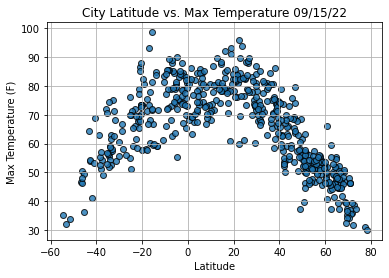

In [17]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,max_temps, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Max Temperature " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()


## create a scatter plot that compares the latitude vs. the humidity.

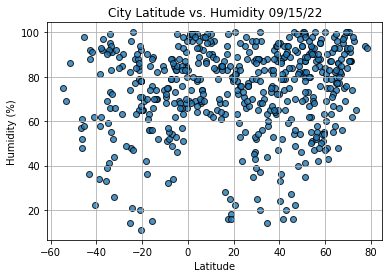

In [18]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,humidity, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Humidity " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.show()

## create a scatter plot that compares the latitude vs. the cloudiness.

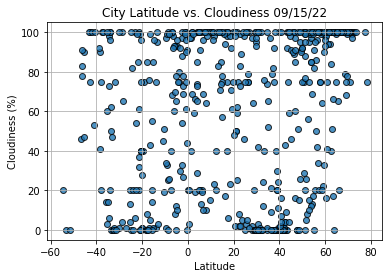

In [19]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,cloudiness, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Cloudiness " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.show()

## create a scatter plot that compares the latitude vs. Wind Speed.

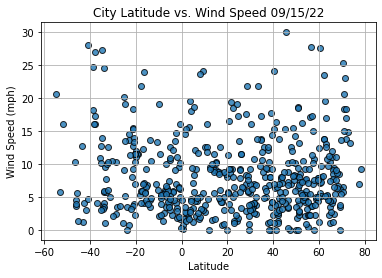

In [20]:
# Today
today = time.strftime("%x")

fig, ax = plt.subplots()

ax.scatter(lats,wind_speed, label="Cities", edgecolors="k",alpha=0.8)
ax.set_title("City Latitude vs. Wind Speed " + today)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

plt.show()

### Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.

In [42]:
# Import dependencies.
from scipy.stats import linregress

In [43]:
def plot_linear_regression(x_values,y_values,title,ylabel,text_coordinates):
    
    linregress(x_values, y_values)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Create a line equation
    line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Get a list of regression line values from the slope and intercept
    regress_values = [(x * slope + intercept) for x in x_values]
    
    # Create a scatter plot with x_values and y_values
    plt.scatter(x_values, y_values)
    
    # Plot the regression line in the scatter plot
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    
    plt.show()
    

### Create the Hemisphere DataFrames

In [44]:
city_data_df.head()
city_data_df.loc[(city_data_df["Latitude"] >= 0)].head()
#city_data_df.loc[(city_data_df["Latitude"]>=0).head()]

,City,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind,Country,Date
2,Sakakah,29.9697,40.2064,78.37,25,0,5.66,SA,2022-09-16 03:48:10
3,Lompoc,34.6391,-120.4579,63.01,88,100,13.80,US,2022-09-16 03:46:27
6,Urusha,54.0500,122.9000,54.28,51,69,2.13,RU,2022-09-16 03:48:13
7,Guerrero Negro,27.9769,-114.0611,70.05,79,0,17.58,MX,2022-09-16 03:47:45
8,Great Yarmouth,52.6083,1.7305,51.03,73,56,16.28,GB,2022-09-16 03:48:13


In [45]:
northern_hemi_df = city_data_df.loc[(city_data_df["Latitude"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Latitude"]<0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

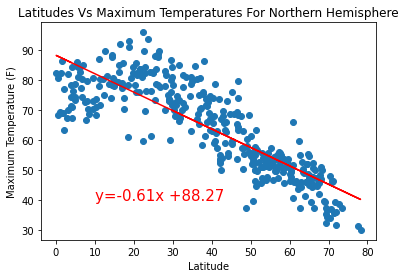

In [47]:
latitudes = northern_hemi_df["Latitude"]
max_temps = northern_hemi_df["Max Temp"]
title = "Latitudes Vs Maximum Temperatures For Northern Hemisphere"
ylabel = "Maximum Temperature (F)"

# Call function
plot_linear_regression(latitudes, max_temps, title, ylabel, (10,40))

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

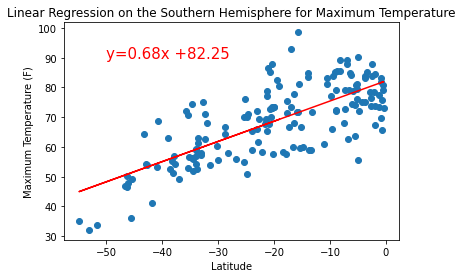

In [48]:
latitudes = southern_hemi_df["Latitude"]
max_temps = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere for Maximum Temperature'
ylabel = "Maximum Temperature (F)"

# Call function
plot_linear_regression(latitudes, max_temps, title, ylabel, (-50,90))

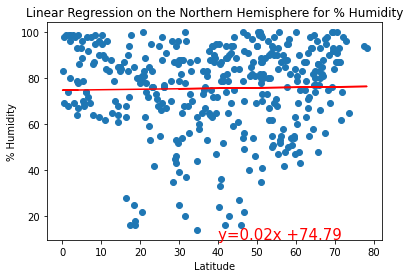

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

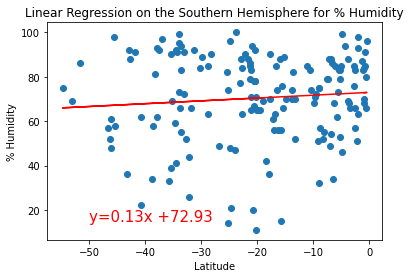

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))


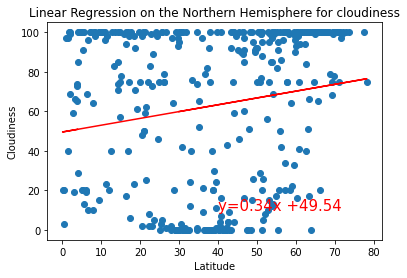

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Clouds"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for cloudiness', 
                       'Cloudiness',(40,10))


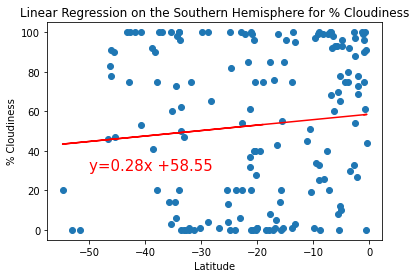

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Clouds"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,30))


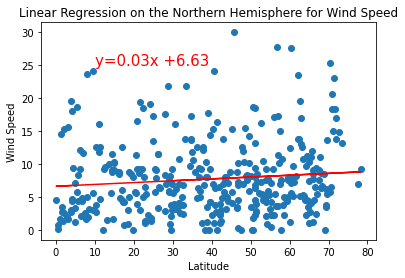

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(10,25))


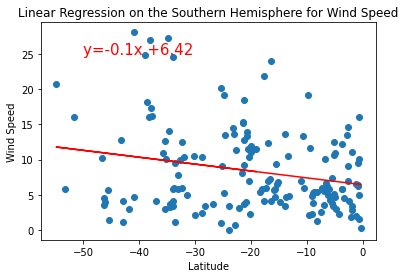

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,25))